# X, Y ¿Qué?

En el cápitulo 2 aprendimos como crear gráficos básicos especificando un marcador (como barras o puntos) y codificando columnas de valores de tu __DataFrame__ a elementos del gráfico como **X e Y**.
`Altair` se toma la libertad de tomar decisiones por ti cuando a detalles se refiere. Por ejemplo, si le asignas la columna `Periodo` a **X** en tu gráfico, `altair` asume que el eje tiene que ir desde el valor mínimo encontrado en tal columna hasta el valor máximo de `Periodo`. También asume que el título del eje es el nombre de la columna: `Periodo`. Y si especificas el tipo de datos que `Periodo` es (cuantitativo, ordinal, nominal o temporal) también decide como codificarlo al eje y como etiquetar los tics. Si fuera una serie de fechas `altair` lo exhibiria de una manera diferente a si fuera una serie de números o una serie de etiquetas.

Tomemos por ejemplo el gráfico de líneas del capítulo 2:

Primero asignamos los datos a un __DataFrame__:

In [1]:
import pandas as pd
import altair as alt

In [9]:
datos = pd.read_csv("../../datos/poblacion.csv")

datos.head()

,Periodo,Número de personas
0,1910,15160369
1,1921,14334780
2,1930,16552722
3,1940,19653552
4,1950,25791017


### Ejemplo del Capítulo 2:

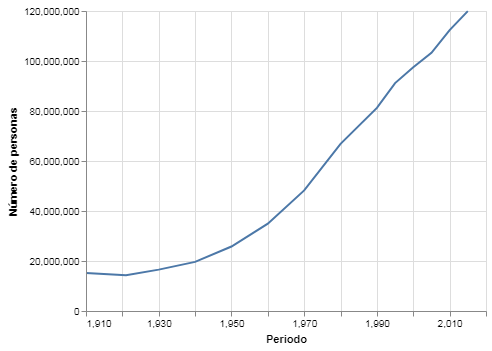

In [7]:
alt.Chart(datos).mark_line().encode(
    x = 'Periodo',
    y = 'Número de personas',
)

Como puedes ver `altair` esta leyendo la columna `Periodo` como una cantidad cuantitativa aunque sabemos que representa los años de 1910 a 2015. Lo fácil sería especificar el tipo de datos que cada asignación es como lo hemos hecho antes:

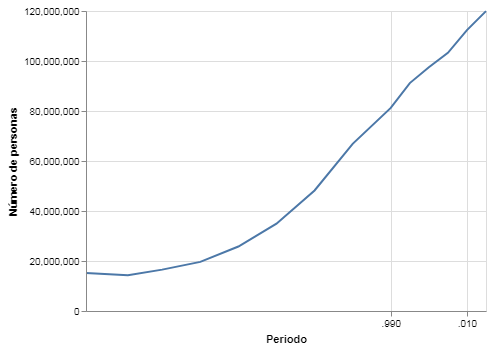

In [8]:
alt.Chart(datos).mark_line().encode(
    x = 'Periodo:T',
    y = 'Número de personas:Q',
)

O-oh. Le hemos dicho a `altair` que `Periodo` es una cantidad temporal pero `altair` no sabe a que cantidad de tiempo nos referimos, ¿segundos? ¿días? ¿nanosegundos? 

Pera esto es mejor transformar nuestros datos en `pandas` que en `altair`. `Pandas` es una biblioteca de `python` muy poderosa y eficáz, si es necesario manipular tus datos se te recomienda hacerlo en `pandas` y no en `altair`.

In [19]:
datos['Periodo'] = pd.to_datetime(datos['Periodo'], format = '%Y')

{{site.data.alerts.tip}} `pd.to_datetime` es un método de `pandas` que toma una serie de datos y la transforma a una serie de fechas (oséa una serie de datos de tipo `datetime`), `pandas` hace lo mejor que pueda para deducir el formato en el que se encuentran tus datos pero si lo sabes es mejor. En este caso es '%Y' porque nuestros datos son de 4 dígitos representando un año cada uno. {{site.data.alerts.end}}

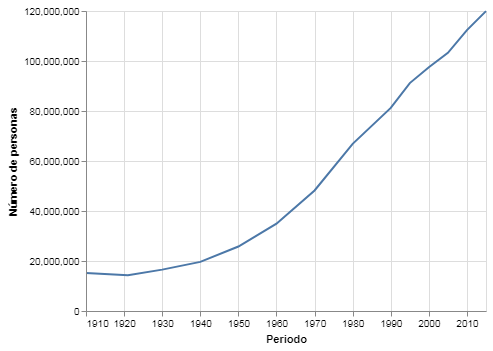

In [21]:
alt.Chart(datos).mark_line().encode(
    x = 'Periodo:T',
    y = 'Número de personas:Q',
)

Ahora las etiquetas de cada tic en el eje **X** si parecen años. 

¿Qué tal si queremos modificar el titulo de cada eje?
Este tipo de especificaciones son más complejas y requieren utilizar los objetos de `altair`, en este caso: `alt.X()` y `alt.Y()`.

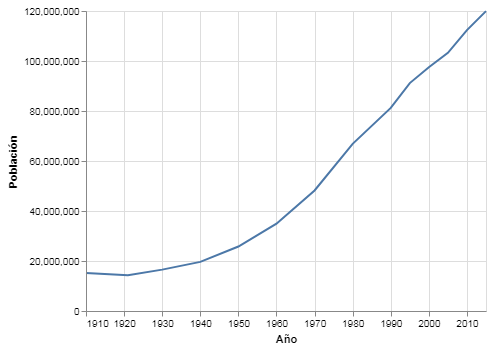

In [22]:
alt.Chart(datos).mark_line().encode(
    x = alt.X('Periodo:T', title = "Año",),
    y = alt.Y('Número de personas:Q', title = 'Población')
)

Utilizando los objetos de `altair` es como podemos modificar nuestros gráficos al gusto. Expandamos un poco más este gráfico.

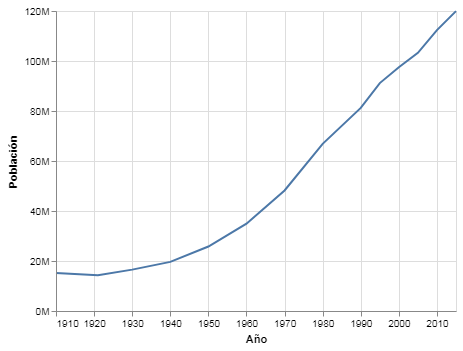

In [31]:
alt.Chart(datos).mark_line().encode(
    x = alt.X("Periodo:T", title = "Año"),
    y = alt.Y("Número de personas:Q", title = "Población", axis = alt.Axis(format = 's')),
)

Aquí estamos utilizando el objeto `alt.Axis()` para personalizar nuestro eje **Y** el cual es un argumento dentro del objeto `alt.Y()`. Esto no es ningún problema para `altair`. Como `altair` lo que hace es traducir tu código `python` a `Vega-lite` que es una librería de `JavaScript` sigue las mismas convenciones en varios aspectos. En este caso, el formato `'s'` le indica a `altair` que estamos hablando en millares. 

Terminemos de personalizar este gráfico con un título más apropiado.

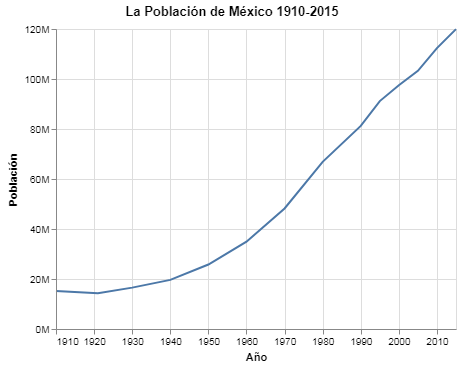

In [32]:
alt.Chart(datos).mark_line().encode(
    x = alt.X("Periodo:T", title = "Año"),
    y = alt.Y("Número de personas:Q", title = "Población", axis = alt.Axis(format = 's')),
).properties(
    title = "La Población de México 1910-2015"
)

***
Algunos de ustedes tal vez esten pensando que los títulos de los ejes son un poco redundantes ya que hemos agregado un título al gráfico. Tan simple como borrarlos:

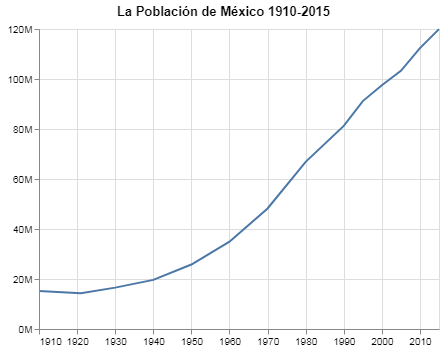

In [33]:
alt.Chart(datos).mark_line().encode(
    x = alt.X("Periodo:T", title = ""),
    y = alt.Y("Número de personas:Q", title = "", axis = alt.Axis(format = 's')),
).properties(
    title = "La Población de México 1910-2015"
)